# SBI Life insurance Dataset

#### This is "SBI Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#import datasets
df=pd.read_excel('sbi insurance.xlsx')

In [3]:
df.shape

(2676, 8)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.0,0.0,27.90,0.0,1.0,3.0,16884.9240,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,1.0,33.77,1.0,0.0,2.0,1725.5523,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 8 columns):
age               1338 non-null float64
sex               1338 non-null float64
bmi               1338 non-null float64
children          1338 non-null float64
smoker            1338 non-null float64
region            1338 non-null float64
charges           1338 non-null float64
insuranceclaim    1338 non-null float64
dtypes: float64(8)
memory usage: 167.3 KB


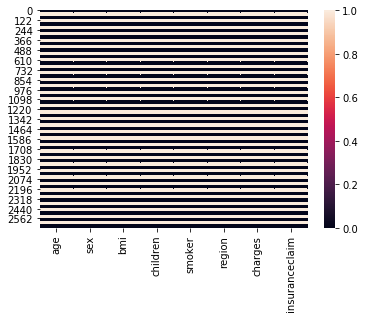

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

age               1338
sex               1338
bmi               1338
children          1338
smoker            1338
region            1338
charges           1338
insuranceclaim    1338
dtype: int64

dataset contain null values

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.0,0.0,27.90,0.0,1.0,3.0,16884.9240,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,1.0,33.77,1.0,0.0,2.0,1725.5523,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df=df.dropna()

In [8]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [9]:
df['insuranceclaim'].unique()

array([1., 0.])

In [10]:
df['smoker'].unique()

array([1., 0.])

In [11]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1,19.0,0.0,27.900,0.0,1.0,3.0,16884.92400,1.0
3,18.0,1.0,33.770,1.0,0.0,2.0,1725.55230,1.0
5,28.0,1.0,33.000,3.0,0.0,2.0,4449.46200,0.0
7,33.0,1.0,22.705,0.0,0.0,1.0,21984.47061,0.0
9,32.0,1.0,28.880,0.0,0.0,1.0,3866.85520,1.0


In [15]:
df['insuranceclaim'].value_counts()

1.0    783
0.0    555
Name: insuranceclaim, dtype: int64

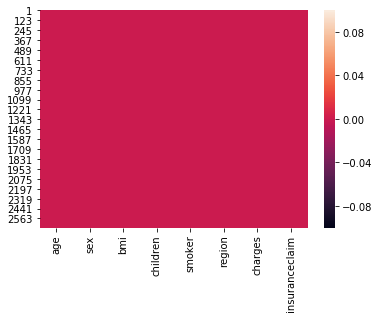

In [13]:
sns.heatmap(df.isnull())

In [14]:
#check datatypes
df.dtypes

age               float64
sex               float64
bmi               float64
children          float64
smoker            float64
region            float64
charges           float64
insuranceclaim    float64
dtype: object

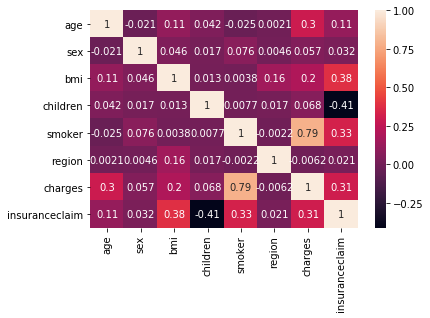

In [16]:
#check corr
sns.heatmap(df.corr(),annot=True)

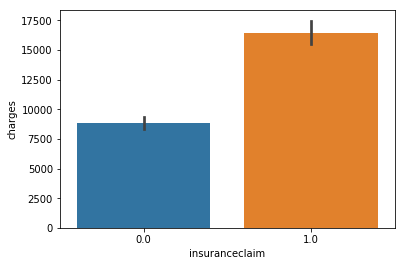

In [17]:
sns.barplot(x='insuranceclaim',y='charges',data=df)

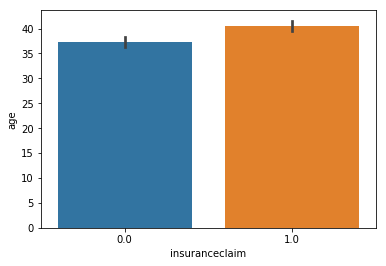

In [18]:
sns.barplot(x='insuranceclaim',y='age',data=df)

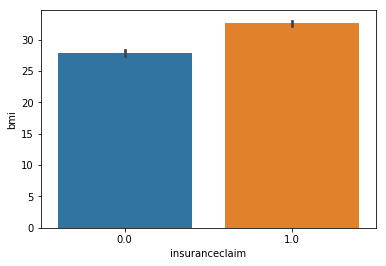

In [21]:
sns.barplot(x='insuranceclaim',y='bmi',data=df)

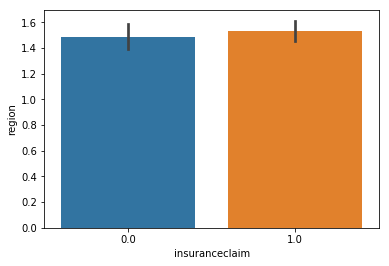

In [22]:
sns.barplot(x='insuranceclaim',y='region',data=df)

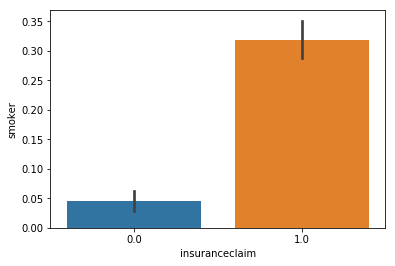

In [23]:
sns.barplot(x='insuranceclaim',y='smoker',data=df)

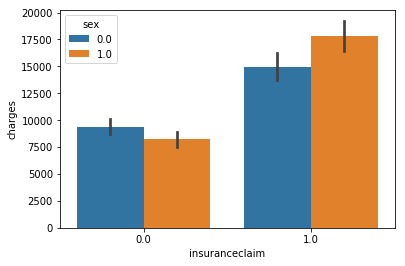

In [19]:
sns.barplot(x='insuranceclaim',y='charges',hue='sex',data=df)

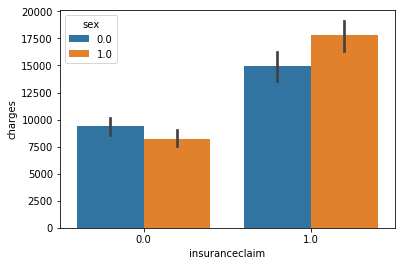

In [20]:
sns.barplot(x='insuranceclaim',y='charges',hue='sex',data=df)

# Build model 

In [24]:
#split the data
x= df.iloc[:,:-1]
y= df['insuranceclaim']

In [25]:
x.shape,y.shape

((1338, 7), (1338,))

In [27]:
df['insuranceclaim'].value_counts()

1.0    783
0.0    555
Name: insuranceclaim, dtype: int64

In [28]:
#We will use f1 score as the metrics as it is balanced dataset problem
#Maximum f1 score in between random states 42 to 100
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        ("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in model:
    maxf1_score(m,x,y)
    print(m)
    print("Mean f1 score for: ",m,cross_val_score(m,x,y,cv=5,scoring="f1").mean())
    print("standard deviation in f1 score for : ",m,cross_val_score(m,x,y,cv=5,scoring="f1").std())
    print(cross_val_score(m,x,y,cv=5,scoring="f1"))
    print('*************************************************************************************************')
    


maximum f1_score is at random state : 73  and it is : 0.9113924050632911
LogisticRegression()
Mean f1 score for:  LogisticRegression() 0.8292097525020526
standard deviation in f1 score for :  LogisticRegression() 0.013503755042694793
[0.81818182 0.83483483 0.85276074 0.8245614  0.81570997]
*************************************************************************************************
maximum f1_score is at random state : 97  and it is : 1.0
DecisionTreeClassifier()
Mean f1 score for:  DecisionTreeClassifier() 0.9790632576090024
standard deviation in f1 score for :  DecisionTreeClassifier() 0.008243624913293718
[0.9968254  0.96226415 0.98101266 0.98076923 0.98412698]
*************************************************************************************************
maximum f1_score is at random state : 55  and it is : 0.7388235294117647
SVC()
Mean f1 score for:  SVC() 0.6374918470009086
standard deviation in f1 score for :  SVC() 0.021265995685668712
[0.60583942 0.6552901  0.61886792 0.

In [32]:
#we will use decisiontree forest as a final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 97,test_size=0.10,stratify=y)

dct=DecisionTreeClassifier(random_state=42)
dct.fit(x_train,y_train)
y_pred=dct.predict(x_test)

In [31]:

#Lets print  confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=91)
dct.fit(x_train,y_train)
y_pred=dct.predict(x_test)
print('f1_score:\n',f1_score(y_test,y_pred))

print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print('classification_report:\n',classification_report(y_test,y_pred))




f1_score:
 0.9871794871794872
confusion_matrix:
 [[55  1]
 [ 1 77]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        56
         1.0       0.99      0.99      0.99        78

    accuracy                           0.99       134
   macro avg       0.98      0.98      0.98       134
weighted avg       0.99      0.99      0.99       134

